In [2]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
# plt.rcParams['figure.figsize'] = [10, 6]

# 특성 공학과 규제

- 특성공학(Feature Engineering) 이란?
    - 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업 
    - 농어의 길이, 농어의 높이 => 농어의 길이 * 농어의 높이 

## 데이터 준비

In [4]:
# length, height, width
# 데이타셋 준비 
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [5]:
# 넘파이배열로 구조 변경 
# 데이타프레임.to_numpy() 
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [6]:
# 농어의 무게 y 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [7]:
# 기존 데이타프레임에 y weight 컬럼 추가 
df['weight'] = perch_weight
df.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


In [8]:
# 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

# 선형회귀 적용

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#모델 생성및 학습 
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )

mse = mean_squared_error(y_test, model_lr.predict(X_test))
rmse = np.sqrt(mse) 

print(model_lr.score(X_train, y_train))
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, model_lr.predict(X_test))))

0.9559326821885706
MSE : 12080.653 , RMSE : 109.912
r2_score : 0.880


In [11]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값 기울기:', model_lr.coef_)

절편 값: -599.1708082981099
회귀 계수값 기울기: [ 9.07538153 69.46401443 38.00385678]


In [12]:
df.columns

Index(['length', ' height', ' width', 'weight'], dtype='object')

0
1
2


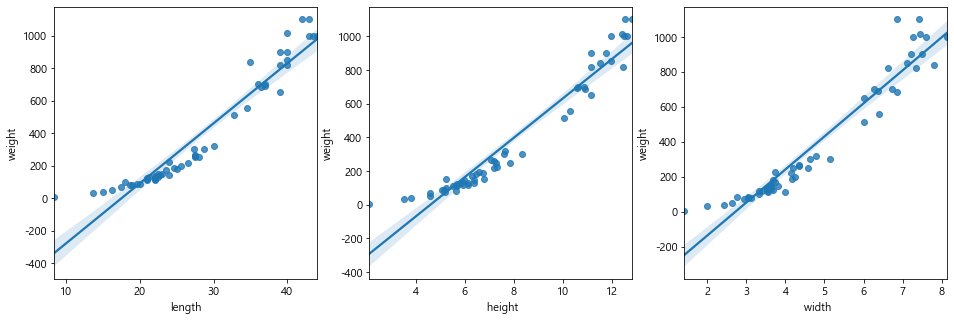

In [15]:
# 1개의 행과 3개의 열을 가진 subplots를 이용. axs는 1x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,5) , ncols=3 , nrows=1)
lm_features = list(df.columns)

# sns.regplot(x='length' , y='weight', data=df , ax=axs[0])
# sns.regplot(x=' height' , y='weight', data=df , ax=axs[1])
# sns.regplot(x=' width' , y='weight', data=df , ax=axs[2])

for i , feature in enumerate(lm_features[:3]):
    print(i)
    sns.regplot(x=feature , y='weight', data=df , ax=axs[i])

# PolynomialFeatures 활용 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)

In [ ]:
print(X_train_poly.shape)

In [ ]:
poly.get_feature_names()

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
test_poly.shape

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train_poly, y_train)
print(model_lr.score(X_train_poly, y_train))
print(model_lr.score(X_test_poly, y_test))

In [ ]:
# degree=5
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
X_train_poly2 = poly.transform(X_train)
X_test_poly2 = poly.transform(X_test)

In [ ]:
print(poly.get_feature_names())

In [ ]:
print(X_train_poly2.shape)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train_poly2, y_train)
print(model_lr.score(X_train_poly2, y_train))
print(model_lr.score(X_test_poly2, y_test))